# s8. Visualization `seaborn`

[Documentation](https://seaborn.pydata.org/)

In [1]:
import numpy as np    
import pandas as pd 
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

We work with a dataset on sales and ratings of video games. Dataset taken from [Kaggle](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

- `Name` $-$ video game name
- `Platform` $-$ the platform the game was launched on
- `Year_of_Release` $-$ release year
- `Genre` $-$ genre
- `Publisher` $-$ publisher
- `NA_Sales` $-$ sales volume in North America (in million units)
- `EU_Sales` $-$ sales volume in the European Union (in million units)
- `JP_Sales` $-$ sales volume in Japan (in million units)
- `Other_Sales` $-$ sales volume in the rest of the world (in million units)
- `Global_Sales` $-$ total sales (in million units)
- `Critic_Score` $-$ cumulative score compiled by Metacritic staff
- `Critic_Count` $-$ number of critics rated the game
- `User_Score` $-$ cumulative score compiled by Metacritic subscribers (users)
- `User_Count` $-$ number of users to rate the game
- `Developer` $-$ responsible for creating the game
- `Rating` $-$ rating (Everyone, Teen, Adults Only, etc.)

In [2]:
df = pd.read_csv('video_games_sales.csv')
df = df.dropna()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## 1. One by one

### 1.1 Quantitative

Quantitative features can be displayed with the following useful functions:
* `histplot`
* `kdeplot`
* `rugplot`
* `boxplot`

In [4]:
action = df[df.Genre == 'Action']
action.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M


#### `histplot` и `kdeplot`

`histplot` with `kde=True` option shows histogram and density plot

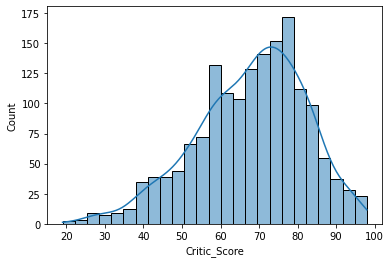

In [7]:
sns.histplot(action.Critic_Score, kde=True);

In [9]:
action.Critic_Score.median()

70.0

In [10]:
action.Critic_Score.mean()

67.82883435582822

We can only look at the density using the `kdeplot` function

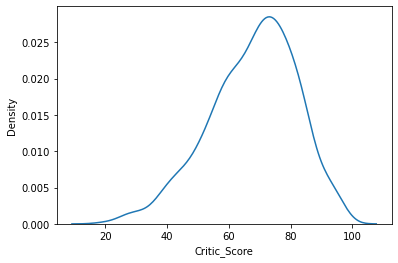

In [ ]:
sns.kdeplot(action.Critic_Score);

#### `rugplot`

`rugplot` shows the same as a distribution density plot, only in one-dimensional form. The denser the lines, the higher the density.

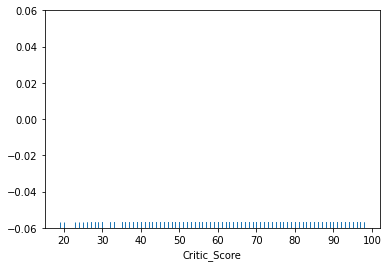

In [ ]:
sns.rugplot(action.Critic_Score);

Для наглядности, `rugplot` часто бывает полезным использовать с другими типами графиков.

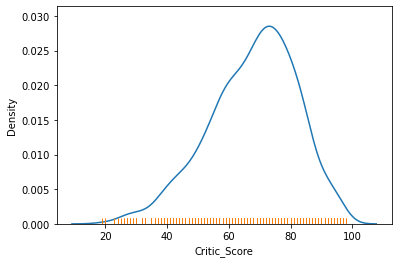

In [11]:
sns.kdeplot(action.Critic_Score)
sns.rugplot(action.Critic_Score);

#### `boxplot`

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/boxplot.png?raw=true" height="400" width="700">
</center>

In [29]:
q1 = action['Critic_Score'].quantile(.25)
q3 = action['Critic_Score'].quantile(.75)
print(q1, q3)
iqr = q3 - q1
print('IQR =', iqr)
pseudo_min = q1 - 1.5 * iqr
print('Minimum =', action['Critic_Score'].min())
print('New minimum =', pseudo_min)
out_left = action[action['Critic_Score'] < pseudo_min].shape[0]
pseudo_max = q3 + 1.5 * iqr
print('Maximum =', action['Critic_Score'].max())
print('New maximum =', pseudo_max)
out_right = sum(action['Critic_Score'] > pseudo_max)
print('Outliers =', out_left + out_right)

59.0 78.0
IQR = 19.0
Minimum = 19.0
New minimum = 30.5
Maximum = 98.0
New maximum = 106.5
Outliers = 21


In [22]:
action[action['Critic_Score'] < pseudo_min].shape[0]

21

In [25]:
True + True - False

2

In [26]:
sum(action['Critic_Score'] < pseudo_min)

21

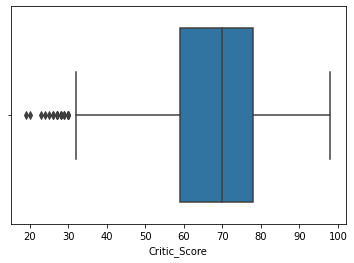

In [ ]:
sns.boxplot(action.Critic_Score);

### 1.2 Qualitative

#### `countplot`

We count the number of values in each category

In [33]:
df['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [34]:
df['Genre'].nunique()

12

In [36]:
import matplotlib.pyplot as plt

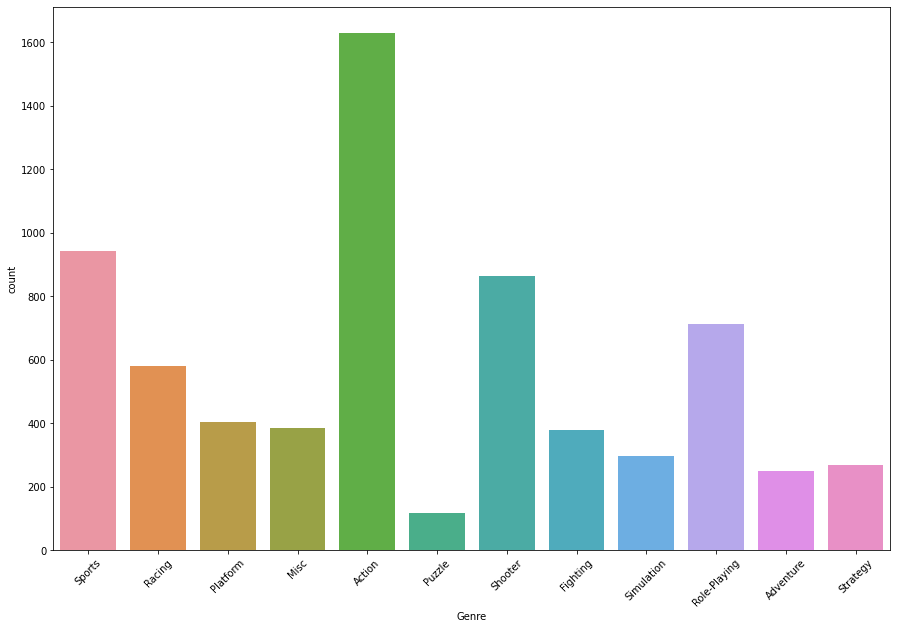

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(df['Genre'])
plt.xticks(rotation=45);

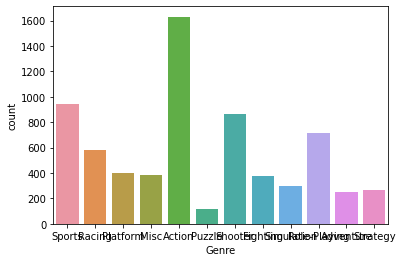

In [ ]:
sns.countplot(x = 'Genre', data = df);

## 2. Combination of features

### 2.1 Quantitative with quantitative

In [42]:
action = df[df.Genre == 'Action']
action.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M


#### `kdeplot`

In [50]:
np.arange(-1, 3.5, 0.5)

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])

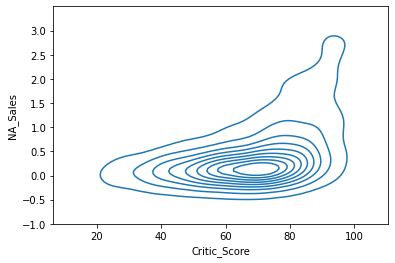

In [52]:
sns.kdeplot(action['Critic_Score'], action['NA_Sales'])
plt.yticks(np.arange(-1, 3.5, 0.5))
plt.ylim([-1, 3.5]);

#### `jointplot`

`jointplot` shows the joint distribution over two variables. It has a `kind` parameter that can take the following values:
* `scatter`
* `reg`
* `resid`
* `kde`
* `hex`

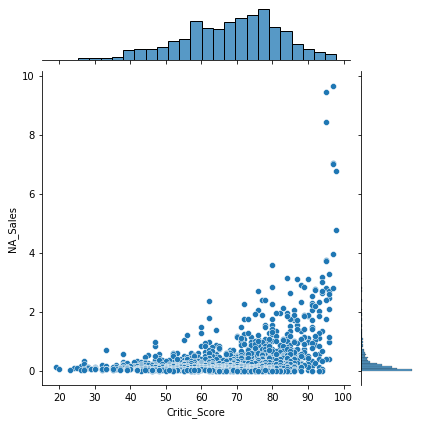

In [53]:
sns.jointplot(data = action, x = 'Critic_Score', 
              y = 'NA_Sales', kind = 'scatter');

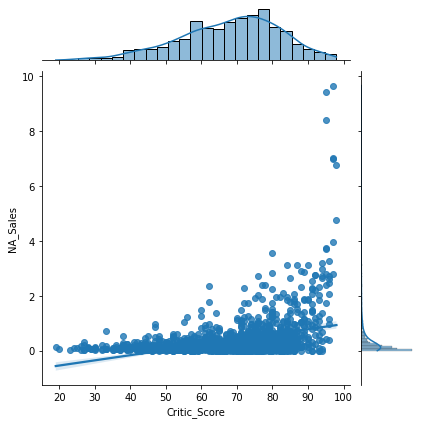

In [ ]:
sns.jointplot(data = action, x = 'Critic_Score',
              y = 'NA_Sales', kind = 'reg');

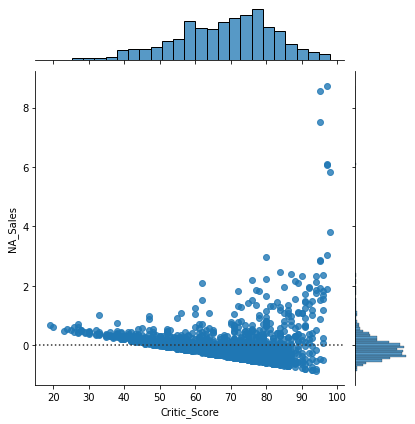

In [54]:
sns.jointplot(data = action, x = 'Critic_Score', 
              y = 'NA_Sales', kind = 'resid');

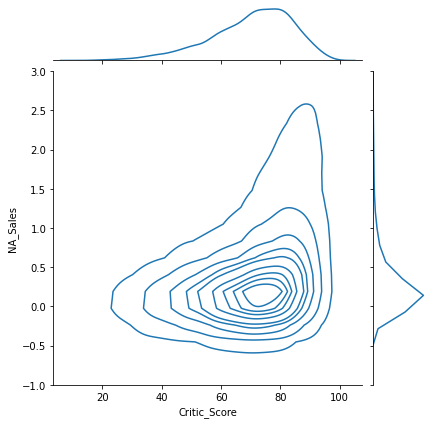

In [56]:
sns.jointplot(data = df, x = 'Critic_Score',
              y = 'NA_Sales', kind = 'kde')
plt.ylim([-1, 3]);

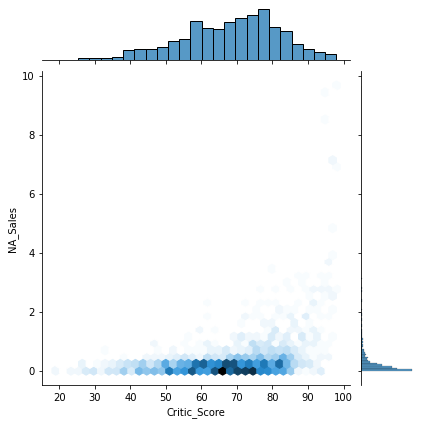

In [57]:
sns.jointplot(data = action, x = 'Critic_Score', 
              y = 'NA_Sales', kind = 'hex');

### 2.2 Quantitative with qualitative

In [58]:
action = df[df.Genre == 'Action']
action.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M


#### `barplot`

`barplot` aggregates data by the values of a categorical variable and applies a specific function to the values of the corresponding groups of the scale variable. By default, this is the **average** function, however, this function can be changed in the `estimator` parameter

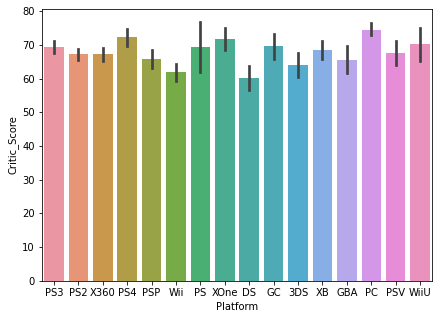

In [60]:
plt.subplots(figsize=(7, 5))
sns.barplot(x = 'Platform', y = 'Critic_Score', data = action);

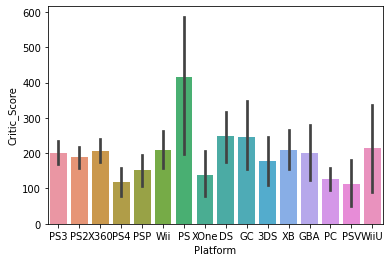

In [62]:
sns.barplot(x = 'Platform', y = 'Critic_Score', 
            data = action, estimator = np.var);

#### `boxplot`

And again, the `boxplot` function we have already considered. When features interact, this function can be much more useful, since everything is clearer in comparison!

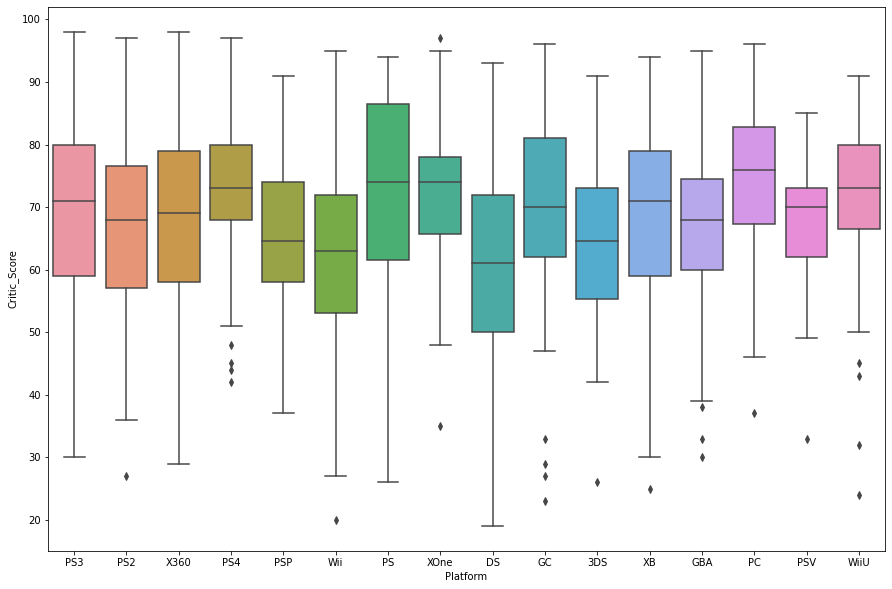

In [65]:
plt.subplots(figsize=(15, 10))
sns.boxplot(x = 'Platform', y = 'Critic_Score', data = action);

For convenience, you can turn

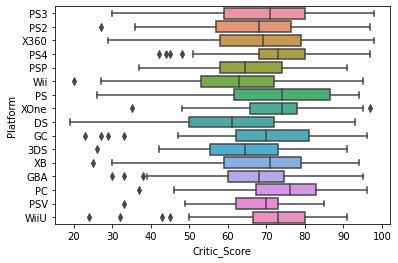

In [ ]:
sns.boxplot(y = 'Platform', x = 'Critic_Score', data = action, orient = 'h');

you can open the third dimension

In [66]:
actionME = action[(action.Rating == 'E') | (action.Rating == 'M')]
actionME.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M


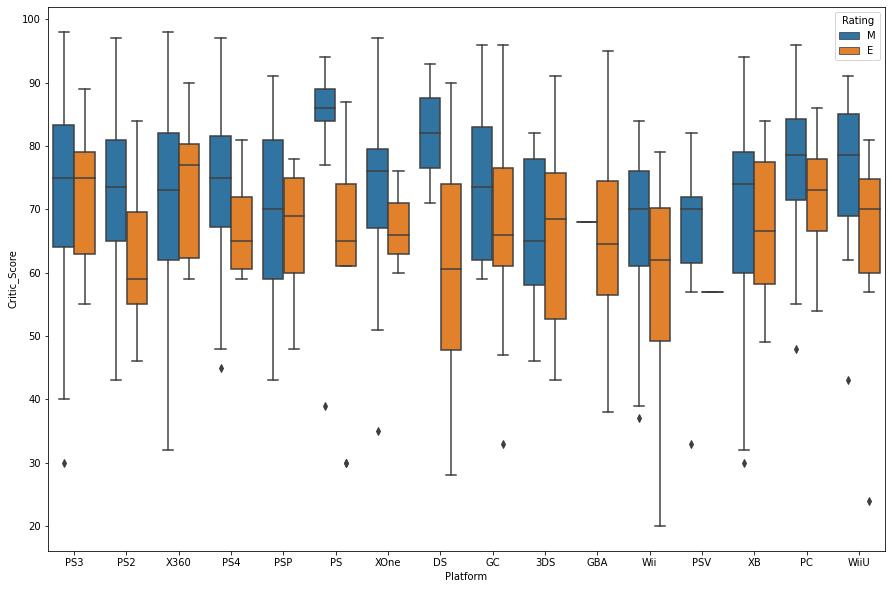

In [67]:
plt.subplots(figsize=(15, 10))
sns.boxplot(x = 'Platform', y = 'Critic_Score', hue = 'Rating', data = actionME);

#### `violinplot`

Performs the same function as `boxplot`. In fact, these are two density distribution graphs rotated by 90 and -90 degrees, sticking together, resulting in something similar to a cello, hence the name.

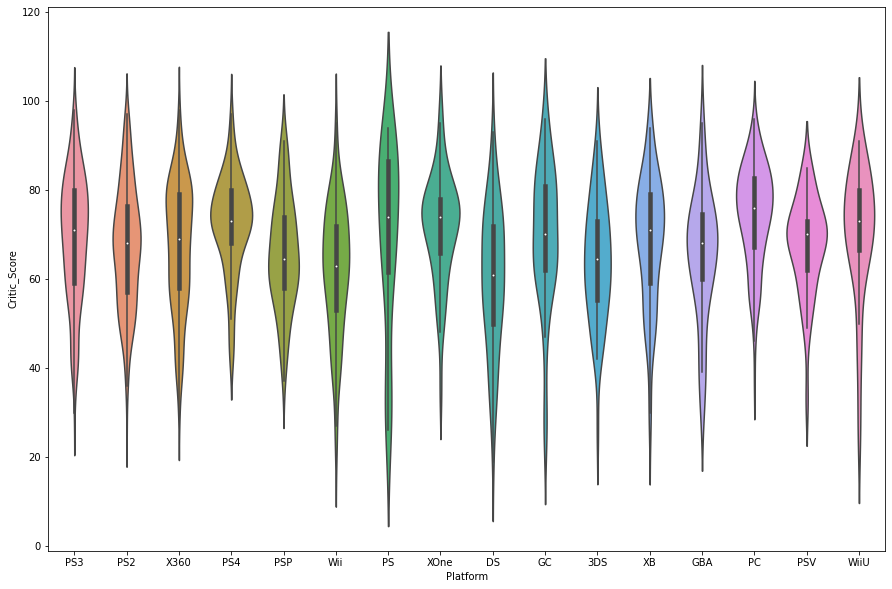

In [68]:
plt.subplots(figsize=(15, 10))
sns.violinplot(x = 'Platform', y = 'Critic_Score', data = action);

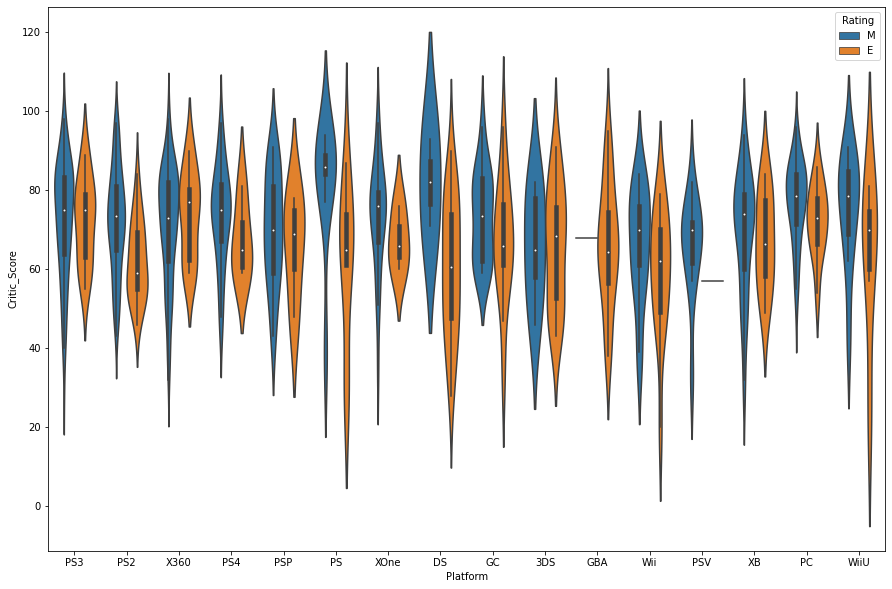

In [69]:
plt.subplots(figsize=(15, 10))
sns.violinplot(x = 'Platform', y = 'Critic_Score', data = actionME, hue = 'Rating');

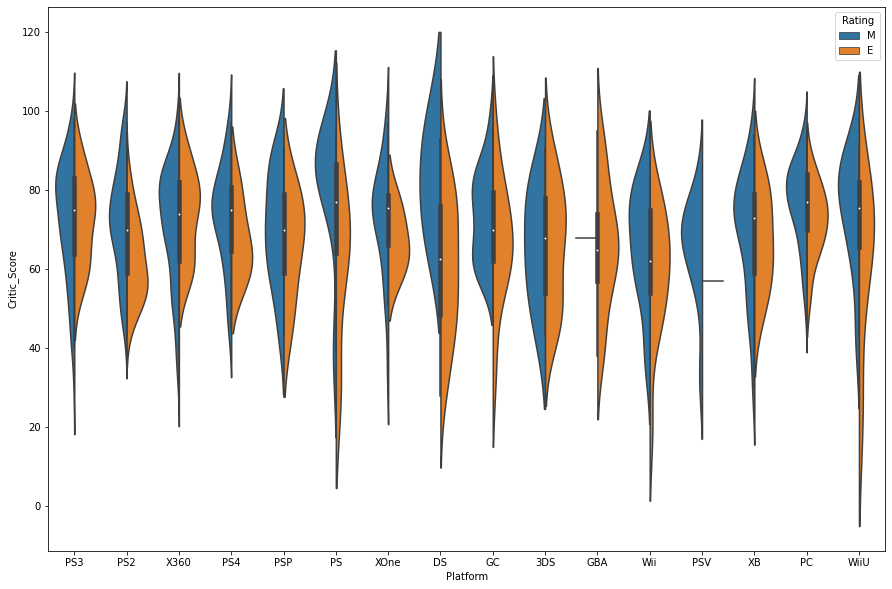

In [70]:
plt.subplots(figsize=(15, 10))
sns.violinplot(x = 'Platform', y = 'Critic_Score', data = actionME, hue = 'Rating', split = True);

#### `stripplot` и `swarmplot`

`stripplot` draws a scatterplot consisting of a single categorical variable

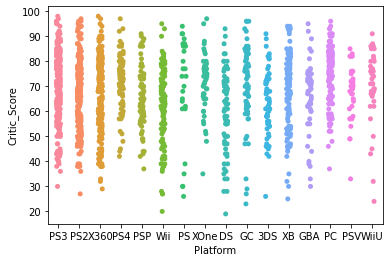

In [ ]:
sns.stripplot(x = 'Platform', y = 'Critic_Score', data = action);

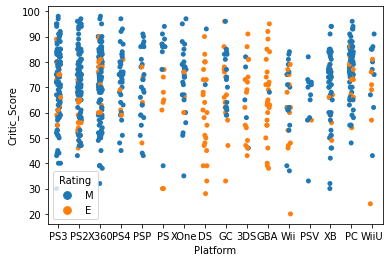

In [ ]:
sns.stripplot(x = 'Platform', y = 'Critic_Score', data = actionME, jitter = True, hue = 'Rating');

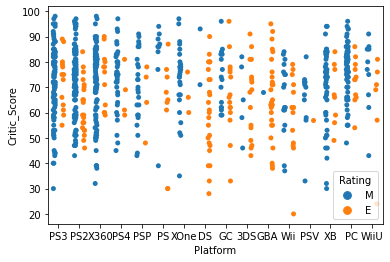

In [ ]:
sns.stripplot(x = 'Platform', y = 'Critic_Score', data = actionME, jitter = True, hue = 'Rating', dodge = True);

`swarmplot` shows exactly the same thing, only the points do not overlap

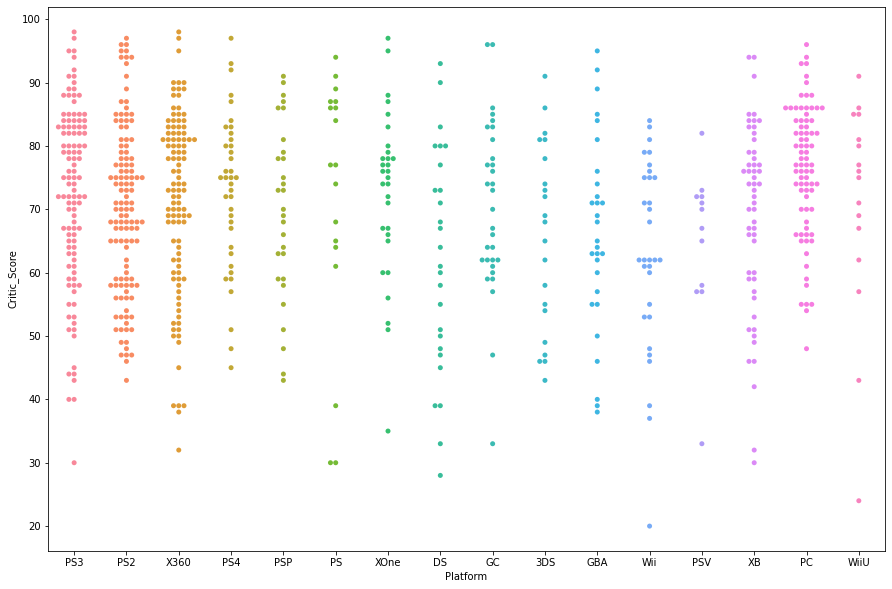

In [71]:
plt.subplots(figsize=(15, 10))
sns.swarmplot(x = 'Platform', y = 'Critic_Score', data = actionME, dodge = True);

Sometimes it is useful to combine these plots with `violinplot`

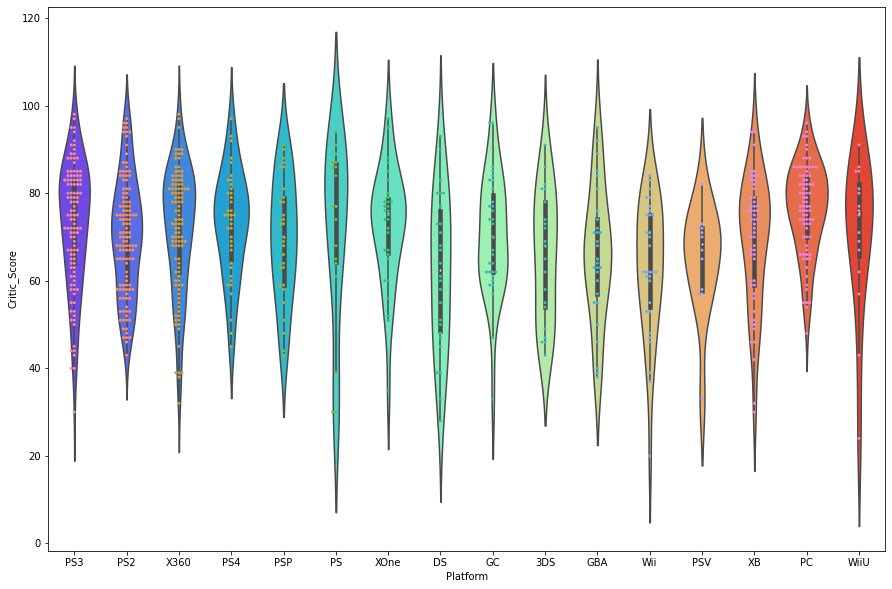

In [72]:
plt.subplots(figsize=(15, 10))
sns.violinplot(x = 'Platform', y = 'Critic_Score', data = actionME, palette = 'rainbow')
sns.swarmplot(x = 'Platform', y = 'Critic_Score', data = actionME, size = 3);

### 2.3 All features

#### `pairplot`

`pairplot` shows the relationship between all pairs of variables. On the diagonal are histograms, and in other places - scatterplots

In [79]:
cols = [col for col in action.columns if 'Sales' in col and col != 'Global_Sales']

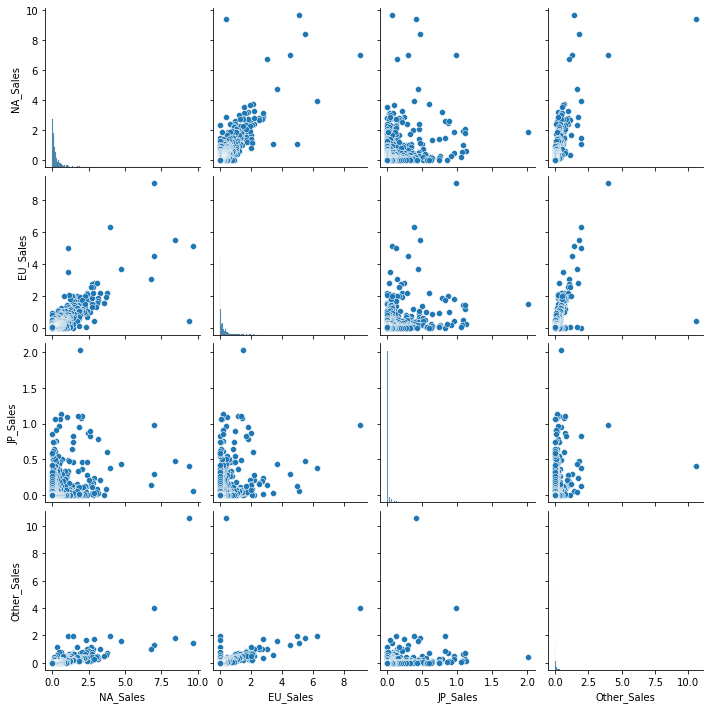

In [86]:
sns.pairplot(action[cols]);

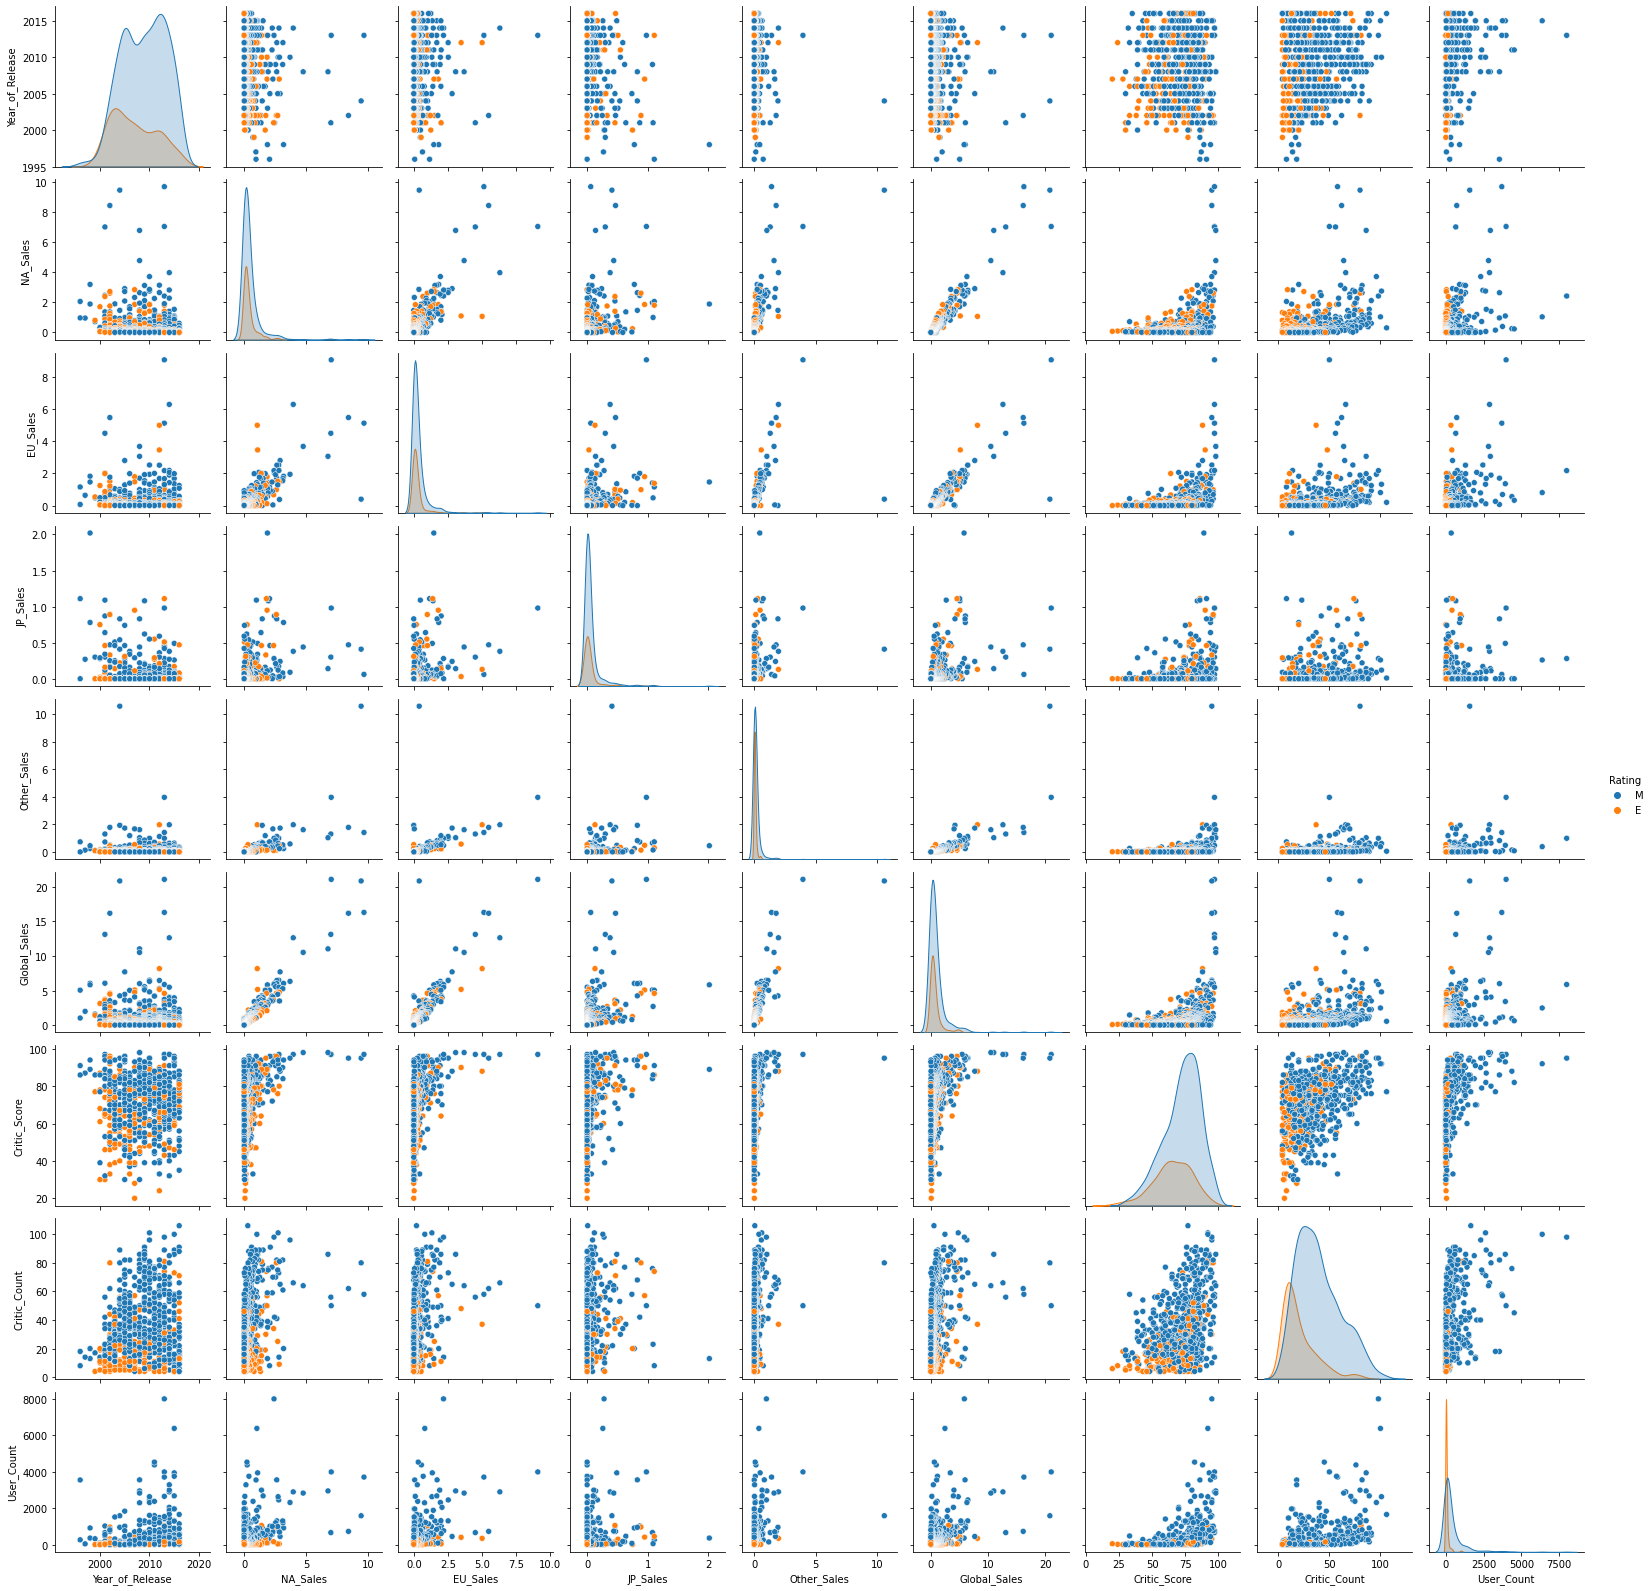

In [ ]:
sns.pairplot(actionME, hue = 'Rating');

#### `PairGrid`

`PairGrid` is a more advanced feature that allows you to show relationships between all pairs of parameters across different functions. In fact, `pairplot` is a special case of it.

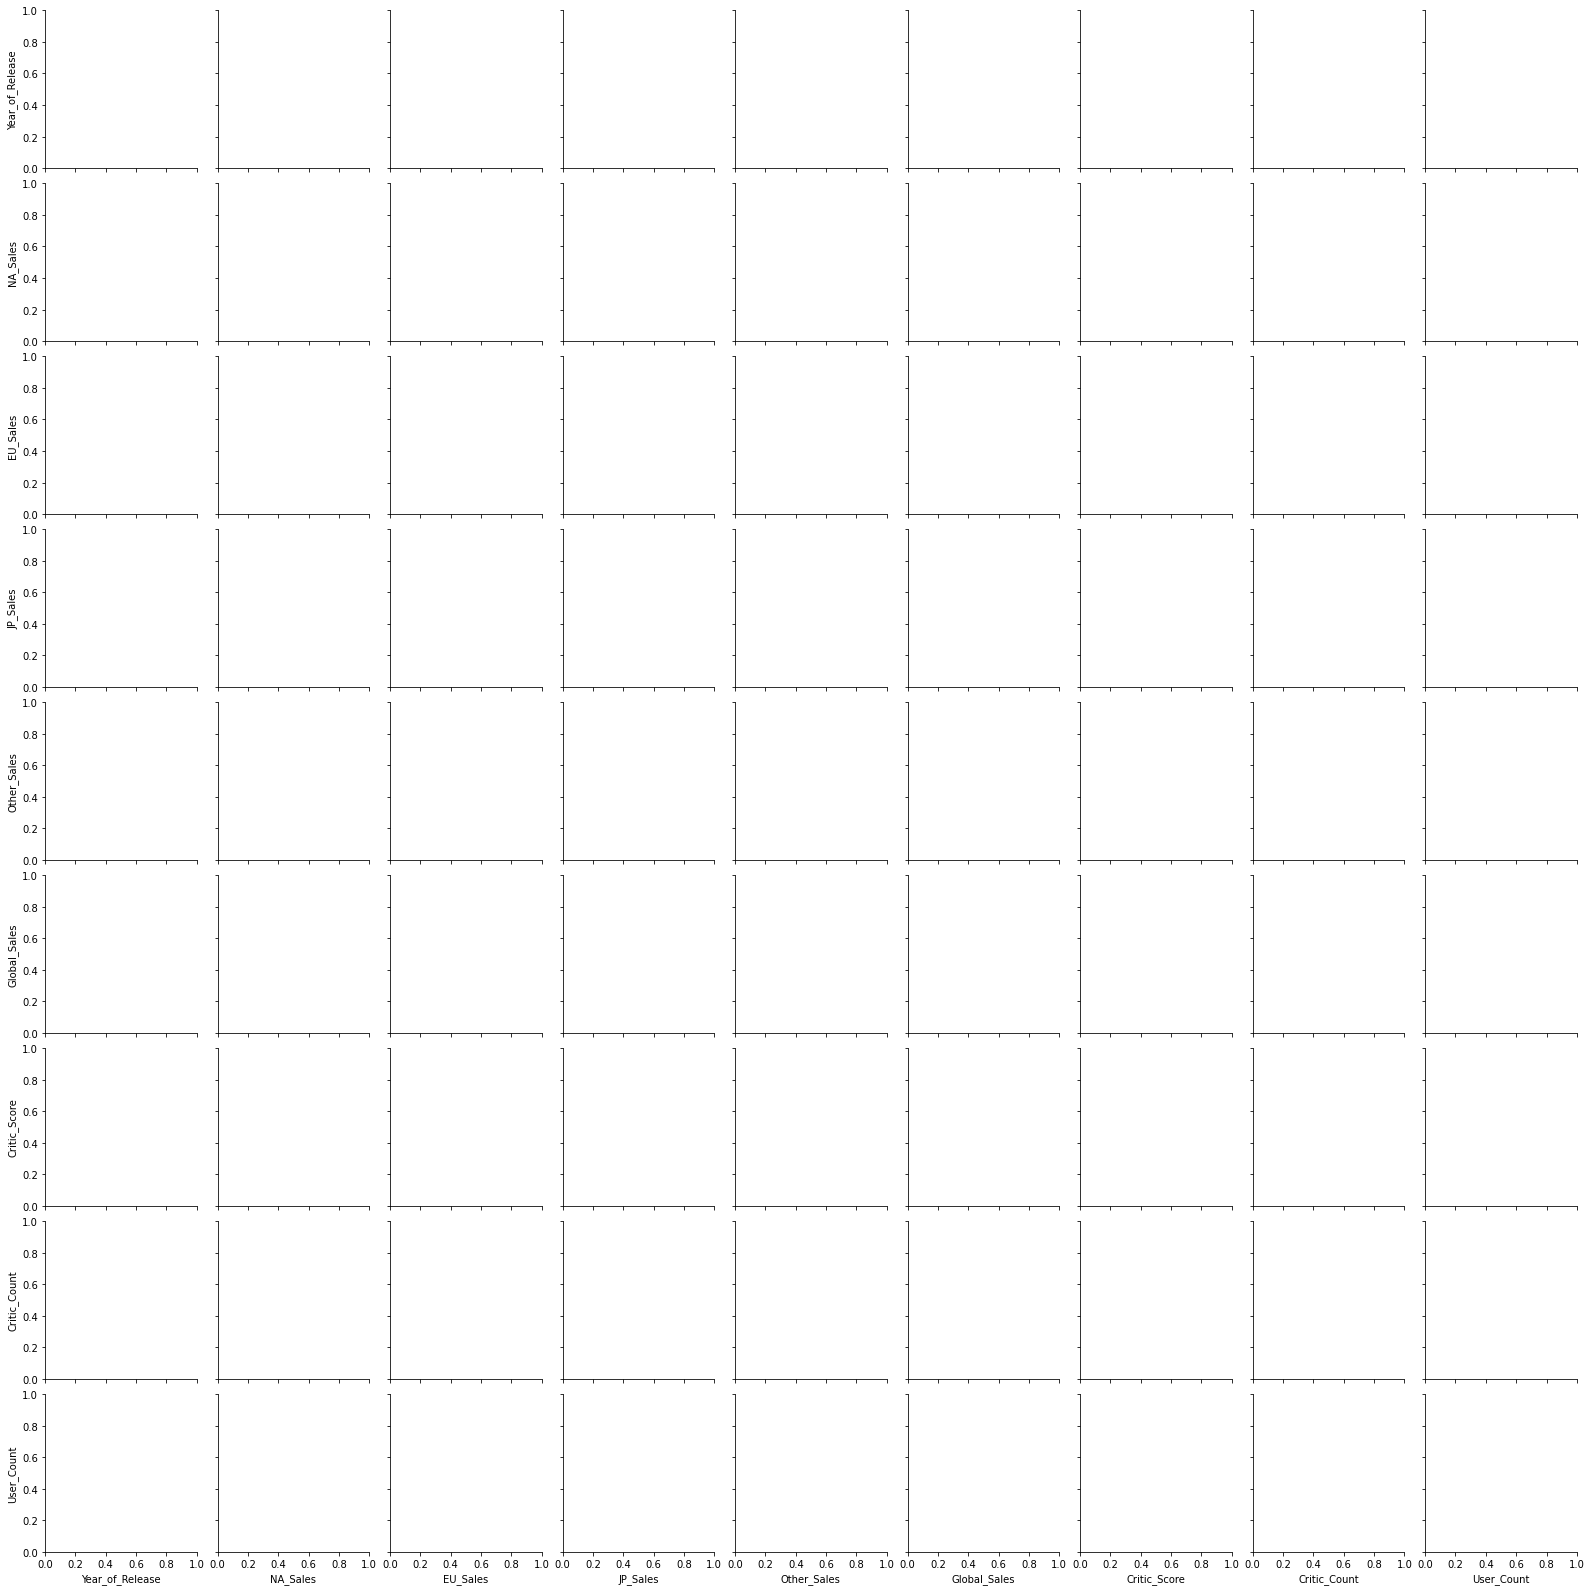

In [ ]:
sns.PairGrid(actionME);

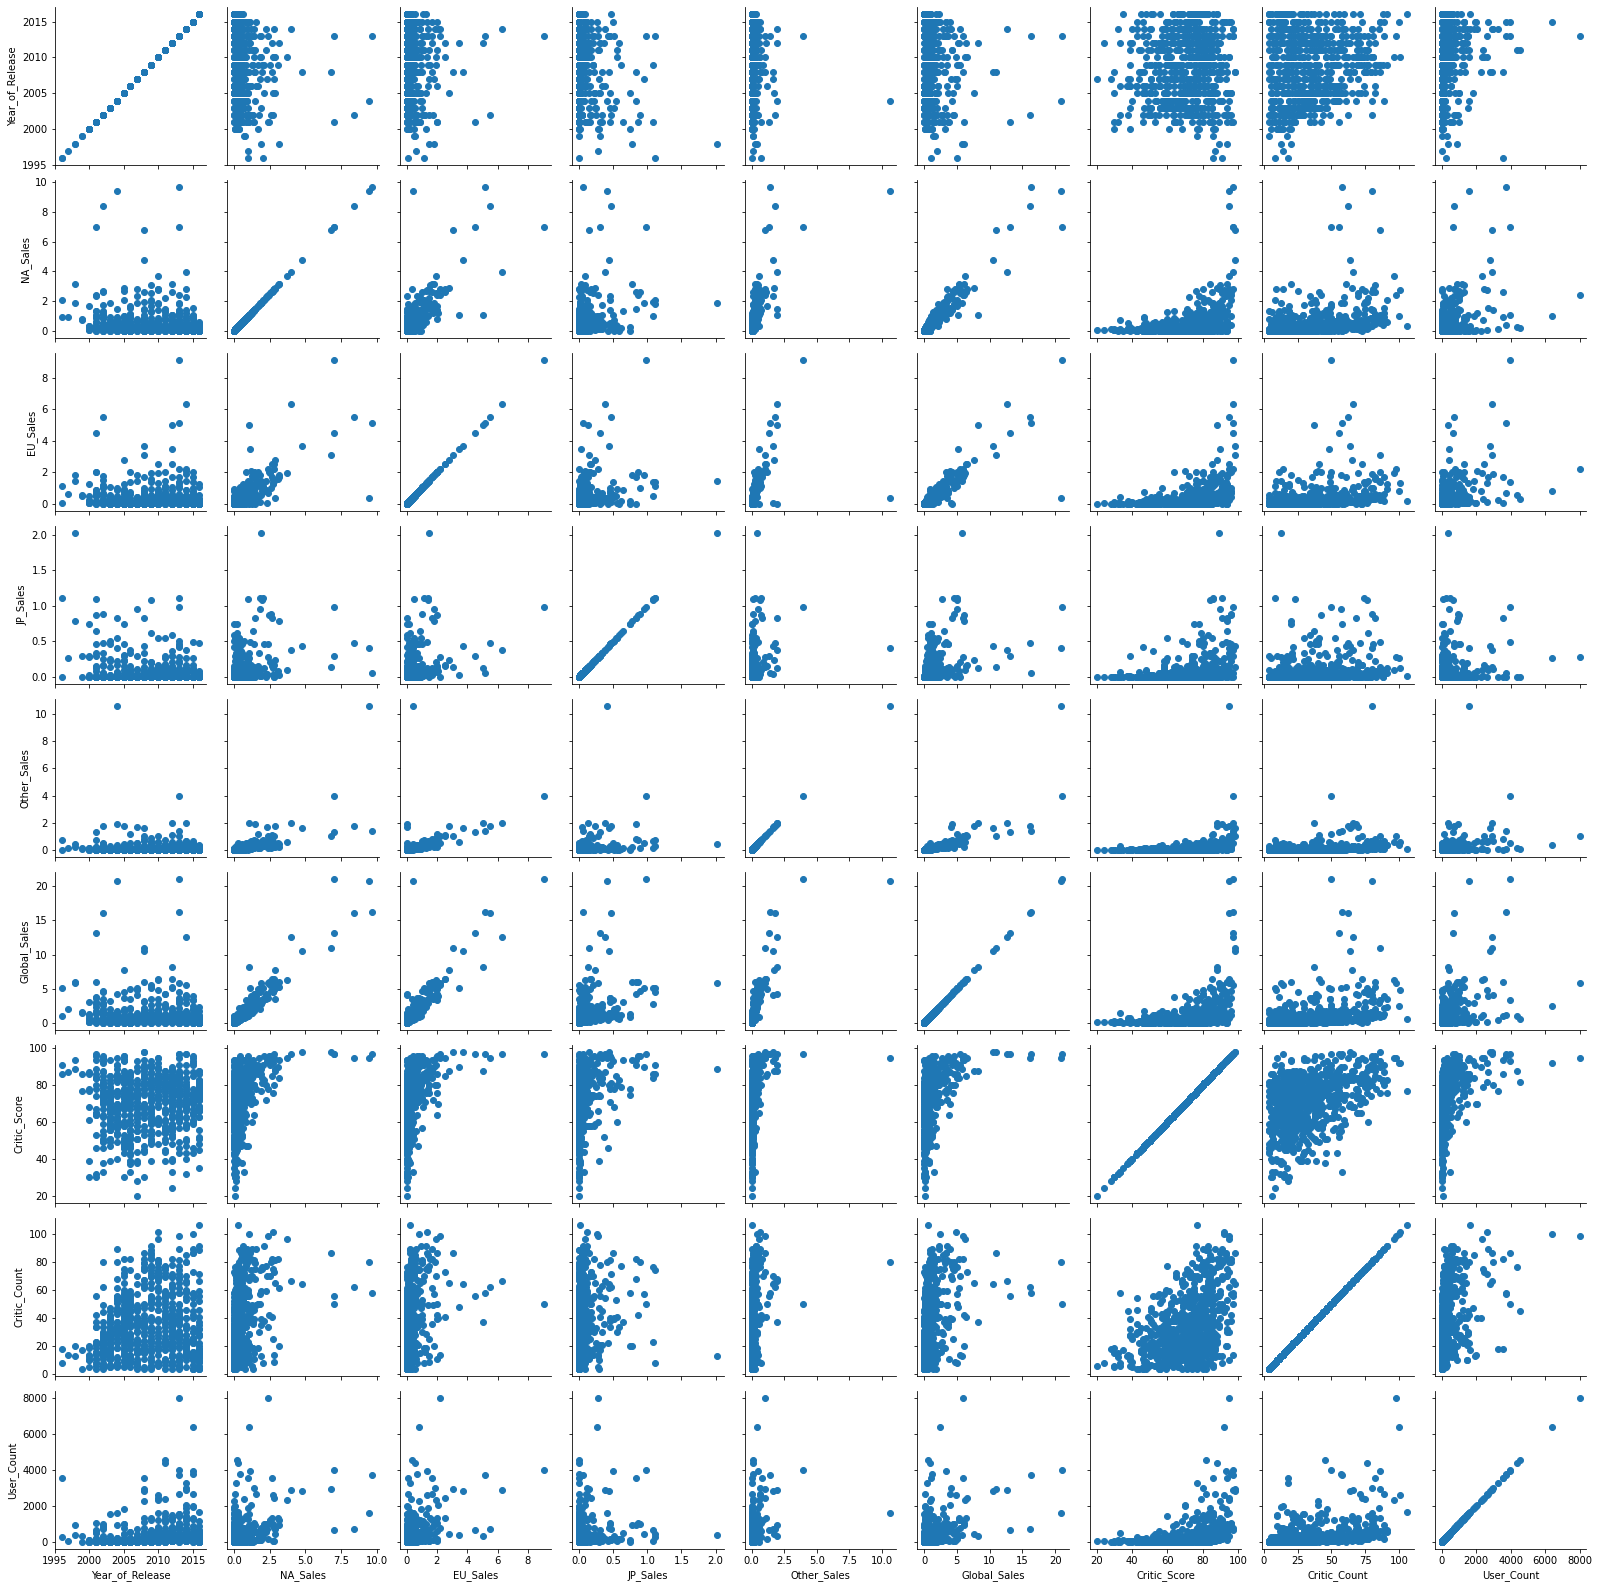

In [ ]:
import matplotlib.pyplot as plt
g = sns.PairGrid(actionME)
g.map(plt.scatter);

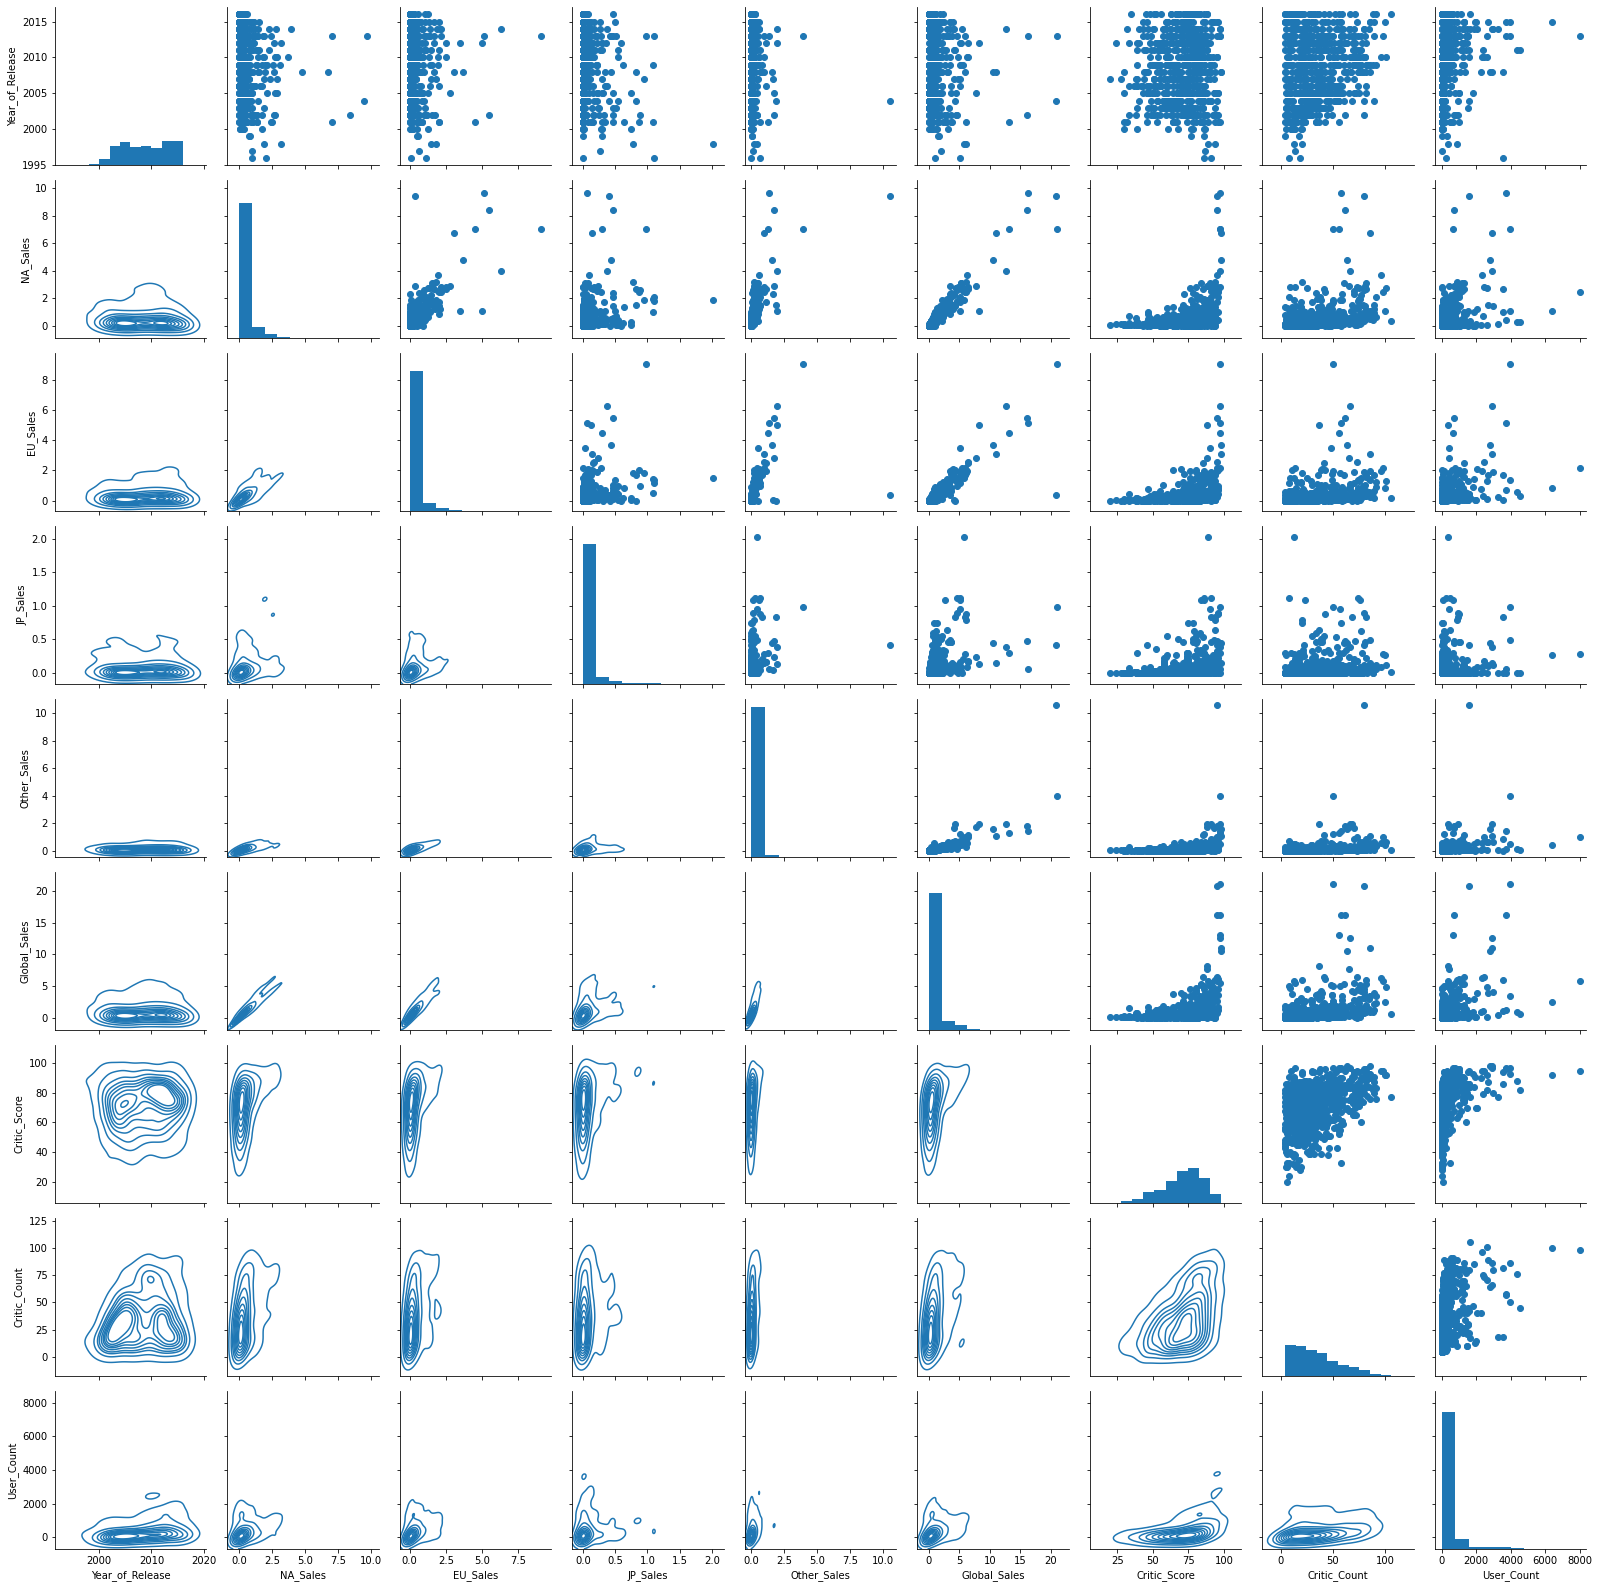

In [88]:
g = sns.PairGrid(actionME)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

### 2.4 Quantitative and several categorical

#### `FacetGrid`

`FacetGrid` allows you to visualize the joint distribution of individual features of several variables

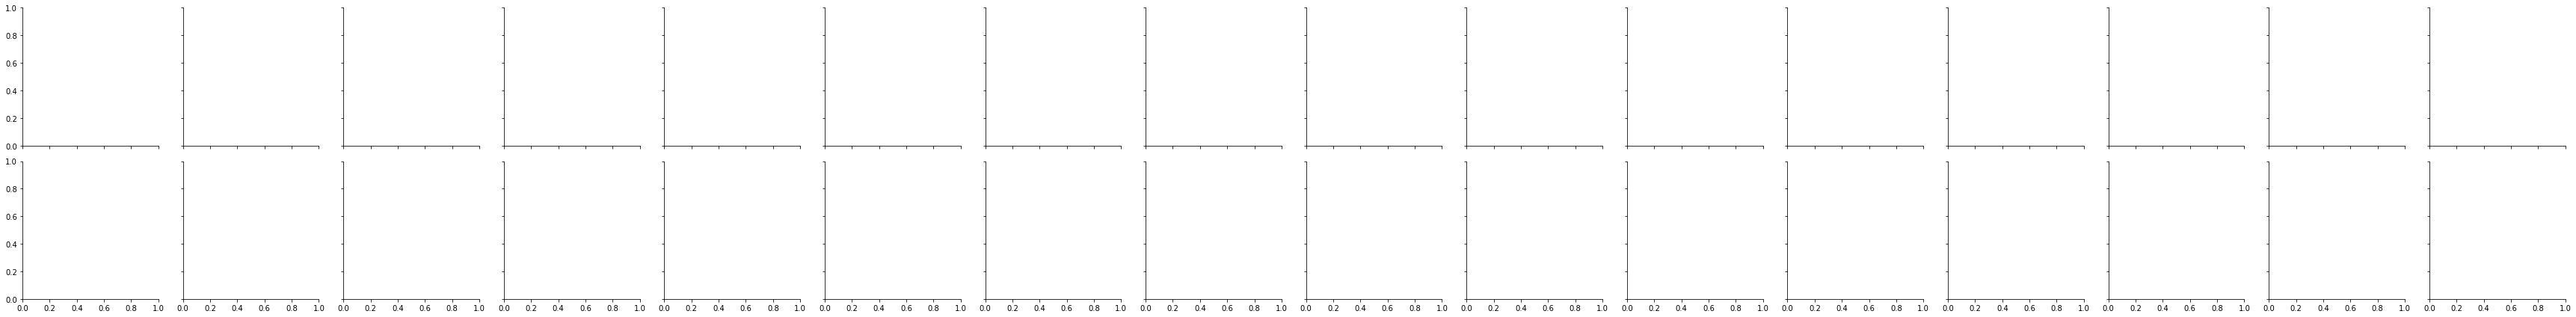

In [ ]:
g = sns.FacetGrid(actionME, col = 'Platform', row = 'Rating')

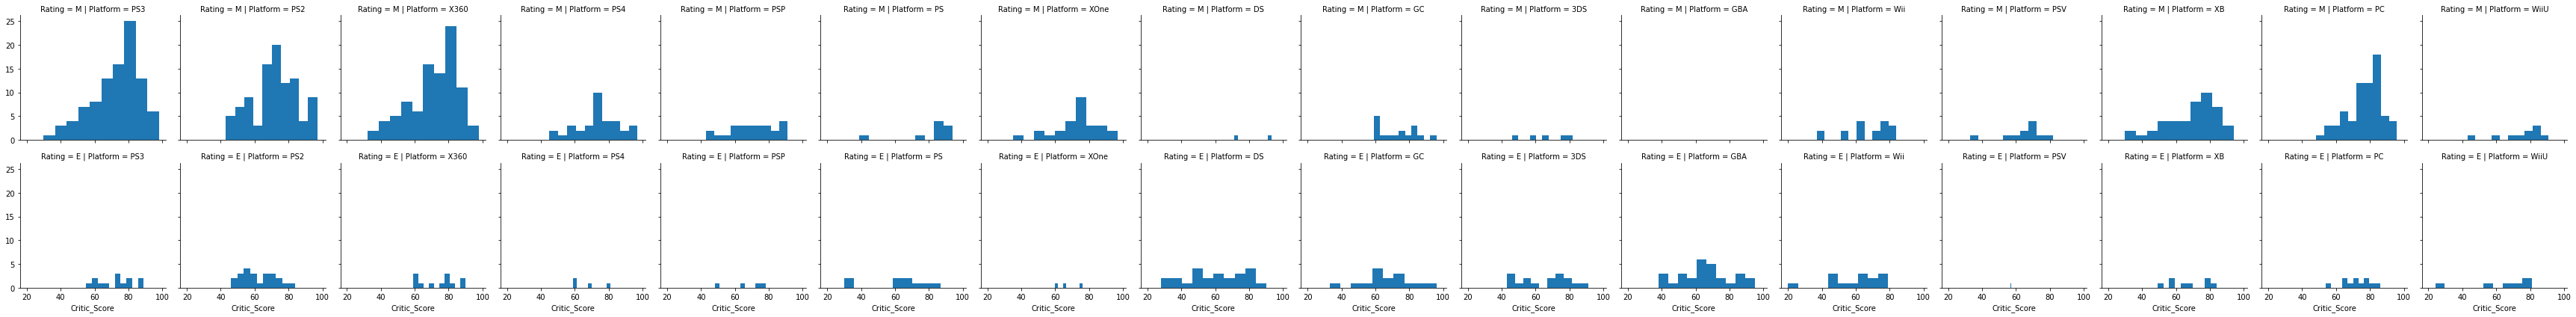

In [ ]:
g = sns.FacetGrid(actionME, col = 'Platform', row = 'Rating')
g = g.map(plt.hist, 'Critic_Score');

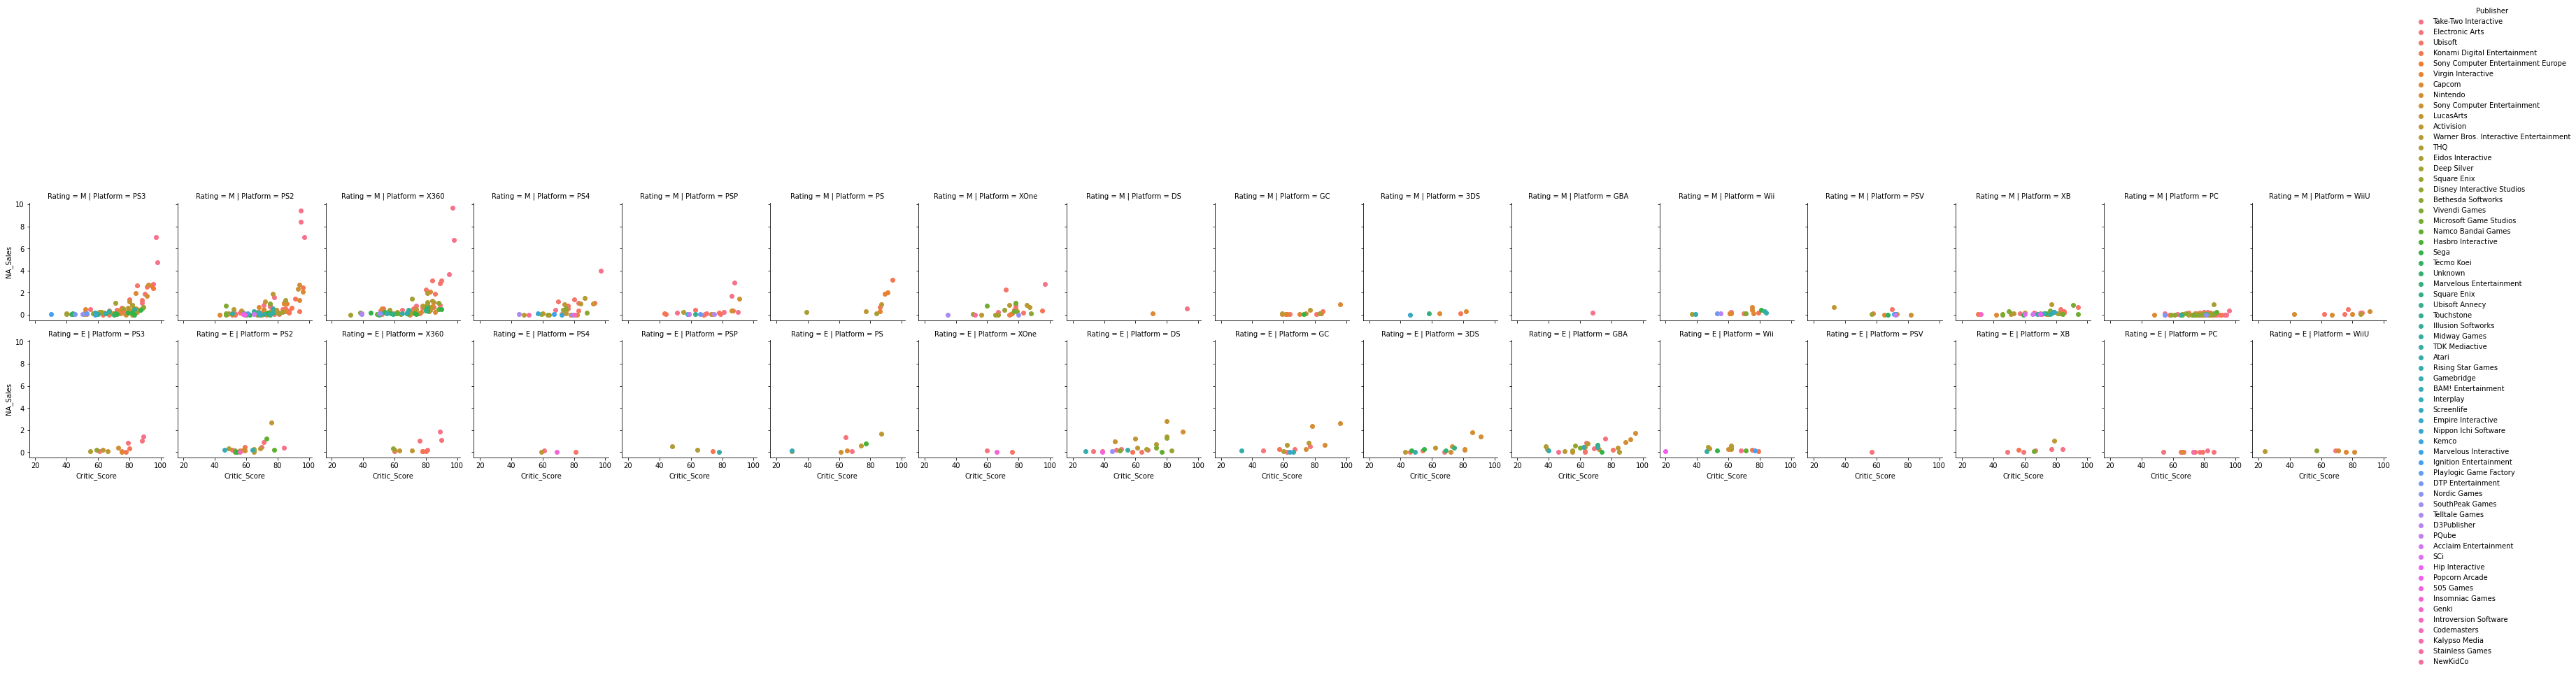

In [ ]:
g = sns.FacetGrid(actionME, col = 'Platform', row = 'Rating', hue = 'Publisher');
g = g.map(plt.scatter, 'Critic_Score', 'NA_Sales').add_legend();

## 3. Matrix Plots

In [89]:
actionME.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.070245,0.040078,-0.114562,-0.005465,-0.030023,0.046292,0.160463,0.251883
NA_Sales,-0.070245,1.000000,0.780214,0.383541,0.710257,0.955927,0.401451,0.358528,0.428894
EU_Sales,0.040078,0.780214,1.000000,0.390008,0.519706,0.885553,0.382943,0.316956,0.485061
JP_Sales,-0.114562,0.383541,0.390008,1.000000,0.295688,0.478846,0.285367,0.195354,0.199915
Other_Sales,-0.005465,0.710257,0.519706,0.295688,1.000000,0.788279,0.256144,0.250809,0.318775
Global_Sales,-0.030023,0.955927,0.885553,0.478846,0.788279,1.000000,0.413238,0.360081,0.470463
Critic_Score,0.046292,0.401451,0.382943,0.285367,0.256144,0.413238,1.000000,0.453146,0.407592
Critic_Count,0.160463,0.358528,0.316956,0.195354,0.250809,0.360081,0.453146,1.000000,0.401255
User_Count,0.251883,0.428894,0.485061,0.199915,0.318775,0.470463,0.407592,0.401255,1.000000


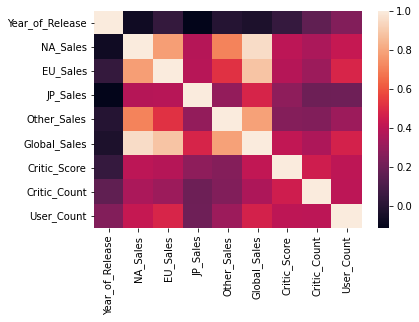

In [ ]:
sns.heatmap(actionME.corr());

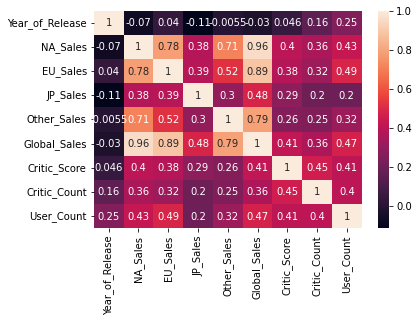

In [90]:
sns.heatmap(actionME.corr(), annot = True);

## 4. Main objects

### Title

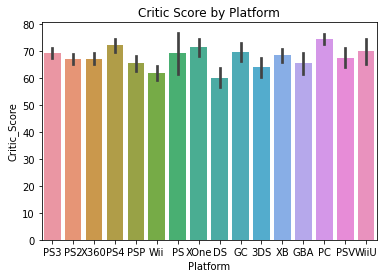

In [91]:
sns.barplot(x = 'Platform', y = 'Critic_Score', data = action).set_title('Critic Score by Platform');

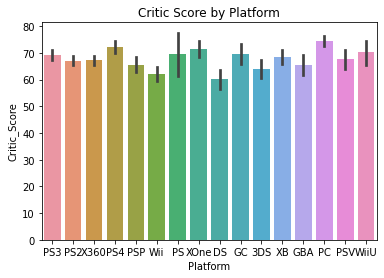

In [92]:
sns.barplot(x = 'Platform', y = 'Critic_Score', data = action).set(title ='Critic Score by Platform');

### Name of x-axis and y-axis

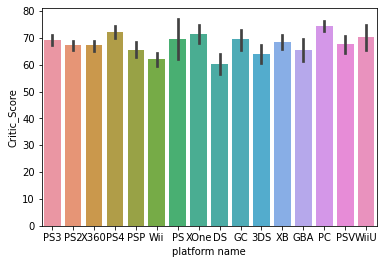

In [93]:
sns.barplot(x = 'Platform', y = 'Critic_Score', data = action).set_xlabel("platform name");

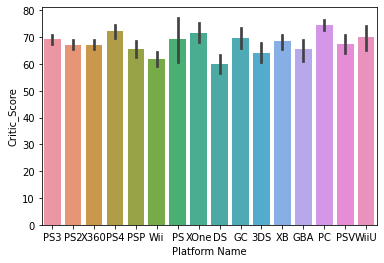

In [97]:
sns.barplot(x = 'Platform', y = 'Critic_Score', data = action)
plt.xlabel('Platform Name');

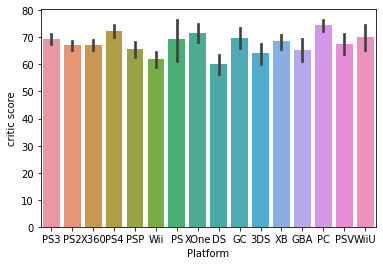

In [94]:
sns.barplot(x = 'Platform', y = 'Critic_Score', data = action).set_ylabel("critic score");

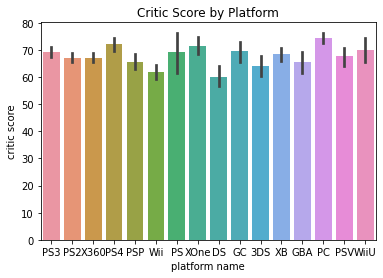

In [95]:
sns.barplot(x = 'Platform', y = 'Critic_Score', data = action) \
.set(xlabel ="platform name", ylabel = "critic score", title ='Critic Score by Platform');

https://clck.ru/32inYi

viz_is_love

## Practice

Use the built-in tips dataset from the seaborn library

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Task 1

Visualize the number of men and women with `countplot`

Add to chart:

  + Title
  + Axis labels
  + Change the color of the graph

### Task 2

Visualize the average number of guests (**size**) at different times. Use   `barplot`

Add to chart:

  + Title
  + Axis labels

### Task 3

Plot correlation `heat map` on numerical data

Add to chart:

  + Title

### Task 4

Show the relationship between all pairs of numeric variables by `pairplot`

### Task 5

Draw `scatter plot` for variables between which there is the strongest degree of linear relationship

Add to chart:

  + Title
  + Axis labels
  + Change the color of the graph

### Task 6

Plot `histogram` over numeric continuous variable

+ Title (choose saturation, size, font)
+ Axis label (choose saturation, size, font)